**Trabalhando com planilhas**

In [2]:
import pandas as pd

In [3]:
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [4]:
df3.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Natal,2018-08-27,606.0,853,2
1,Natal,2018-11-25,563.0,853,2
2,Natal,2019-03-11,308.0,852,3
3,Natal,2019-01-07,271.0,854,3
4,Natal,2019-03-09,699.0,853,3


In [5]:
#Juntando todos os arquivos com .concat de concatenar (um abaixo do outro)
df = pd.concat([df1,df2,df3,df4,df5])

In [6]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [7]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [8]:
#Acessando amostra aleatória com .sample
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
213,Natal,2019-01-02,42.12,1035,1
40,Fortaleza,2019-02-13,19.13,1002,4
28,Natal,2019-02-13,705.00,853,2
50,Aracaju,2018-01-01,7.52,1522,5
87,Salvador,2019-01-01,135.19,1034,2


In [9]:
#Verificando o tipo de dados em cada coluna com .dtypes
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [10]:
#Alterando o tipo de dado de uma coluna
df["LojaID"] = df["LojaID"].astype("object")

In [11]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

**Trabalhando com valores faltantes**

In [12]:
#Consultando total de valores faltantes por linha com .isnull e .sum
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [13]:
#Substituindo valores nulos pela média com .fillna
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)


In [14]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [15]:
#Substituindo os valores nulos por 0
df["Vendas"].fillna(0, inplace=True)

In [16]:
#Apagando as linhas com valores nulos com .dropna
df.dropna(inplace=True)

In [17]:
#Apagando as linhas com valores nulos com base apenas em 1 coluna
df.dropna(subset=["Vendas"], inplace=True)

In [18]:
#Apagando as linhas com valores faltantes em TODAS AS COLUNAS
df.dropna(how="all", inplace=True)

**Criando colunas novas**

In [19]:
#Criando a coluna de receita com .mul de multiplication
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [20]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [21]:
#Descobrindo a maior receita com .max
df["Receita"].max()

3544.0

In [22]:
#Descobrindo as linhas com maiores receitas com .nlargest
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [23]:
#Descobrindo as linhas com menores receitas com .nsmallest
df.nsmallest(2, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01


In [24]:
#Descobrindo a soma de receitas por cidade com .groupby de agrupamento e .sum
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [25]:
#Ordenando o cojunto de dados com .sort_values
df.sort_values("Receita", ascending=False).head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0


**Trabalhando com datas**

In [27]:
#Transformando a coluna Data em tipo inteiro com .astype
df["Data"] = df["Data"].astype("int64")

In [28]:
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [29]:
#Transformando a coluna Data em tipo data com .to_datetime
df["Data"] = pd.to_datetime(df["Data"])

In [30]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [32]:
#Agrupando receita por ano com .dt.year
df.groupby(df["Data"].dt.year)["Receita"].sum()


Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [33]:
#Criando uma nova coluna com ano
df["Ano_Venda"] = df["Data"].dt.year

In [34]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
91,Aracaju,2018-01-01,200.85,1522,6,1205.10,2018
5,Fortaleza,2019-01-01,37.30,1002,5,186.50,2019
180,Natal,2019-01-02,116.63,1035,2,233.26,2019
114,Natal,2019-01-02,25.52,1034,1,25.52,2019
87,Aracaju,2018-01-01,116.71,1520,4,466.84,2018


In [35]:
#Extraindo mês e dia com .dt.month e .dt.day
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [36]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda
3,Fortaleza,2019-02-10,20.95,1004,6,125.70,2019,2,10
81,Fortaleza,2019-01-01,10.68,1005,1,10.68,2019,1,1
99,Aracaju,2018-01-01,139.32,1521,3,417.96,2018,1,1
29,Aracaju,2018-01-01,44.04,1520,6,264.24,2018,1,1
60,Recife,2019-01-01,37.97,983,1,37.97,2019,1,1


In [37]:
#Retornando a data mais antiga com .min
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [38]:
#Calculando a diferença em dias para a data mais antiga
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [39]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias
208,Natal,2019-01-02,39.40,1036,3,118.20,2019,1,2,366 days
31,Fortaleza,2019-01-01,23.46,1002,4,93.84,2019,1,1,365 days
156,Natal,2019-01-02,36.14,1037,3,108.42,2019,1,2,366 days
138,Fortaleza,2019-03-02,150.38,983,6,902.28,2019,3,2,425 days
36,Natal,2019-02-09,328.00,853,2,656.00,2019,2,9,404 days


In [40]:
#Criando a coluna de trimestre com .dt.quarter
df["trimestre_venda"] = df["Data"].dt.quarter

In [51]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
120,Recife,2019-03-02,184.90,982,4,739.60,2019,3,2,425 days,1
153,Salvador,2019-01-02,17.41,1035,2,34.82,2019,1,2,366 days,1
10,Natal,2018-10-27,828.00,852,4,3312.00,2018,10,27,299 days,4
149,Natal,2019-01-02,22.38,1034,3,67.14,2019,1,2,366 days,1
126,Salvador,2019-03-02,41.69,1036,2,83.38,2019,3,2,425 days,1


In [52]:
#Filtrando vendas de 2019 referentes ao mês de março .loc[]
vendas_marco_2019 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [55]:
print(vendas_marco_2019.sample(3))

        Cidade       Data  Vendas  ... dia_venda  diferenca_dias  trimestre_venda
138     Recife 2019-03-02  150.38  ...         2        425 days                1
135  Fortaleza 2019-03-02   10.79  ...         2        425 days                1
7        Natal 2019-03-18  886.00  ...        18        441 days                1

[3 rows x 11 columns]


# **Visualização de dados**

In [56]:
#Descobrindo quantidade de linhas por espécie de uma da features com .value_counts()
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

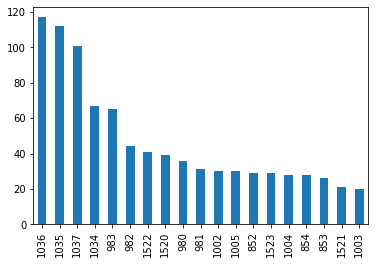

In [57]:
#Criando gráfico de barras: total de vendas por loja com .plot.bar() 
df["LojaID"].value_counts(ascending=False).plot.bar()

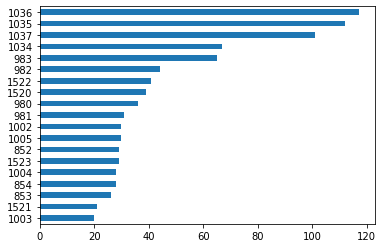

In [60]:
#Criando gráfico de barras horizontais com .plot.barh()
df["LojaID"].value_counts(ascending=True).plot.barh()

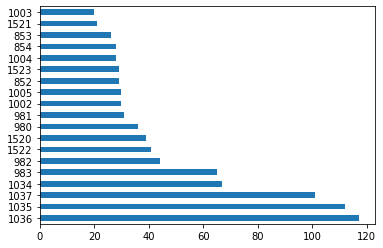

In [61]:
#Excluindo linha de informações do gráfico com ;
df["LojaID"].value_counts().plot.barh();

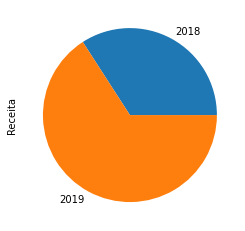

In [62]:
#Gráfico de pizza: receita por ano com .plot.pie() pie de torta
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [63]:
#Total de "vendas" por cidade com .value_counts()
df["Cidade"].value_counts()

Salvador     240
Natal        240
Recife       142
Fortaleza    142
Aracaju      130
Name: Cidade, dtype: int64

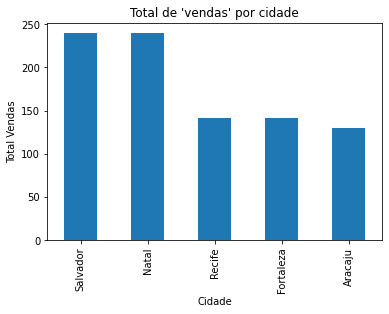

In [66]:
#Adicionando um título e alterando nome de eixos com matplotlib.pyplot
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de 'vendas' por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");


Text(0, 0.5, 'Total Vendas')

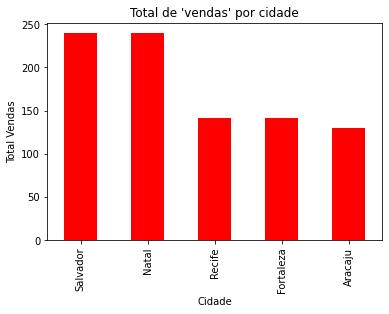

In [69]:
#Alterando cor do gráfico
df["Cidade"].value_counts().plot.bar(title="Total de 'vendas' por cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas")

In [70]:
#Alterando estilo do gráfico com .style.use <https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html>
plt.style.use("ggplot")

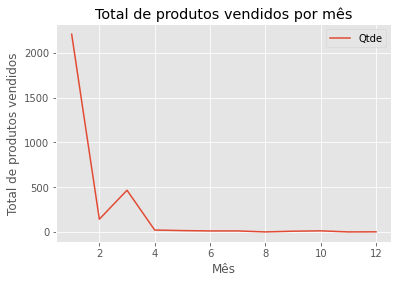

In [75]:
#Gráfico de linhas .plot() quantidade de vendas por mês
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title="Total de produtos vendidos por mês")
plt.xlabel("Mês")
plt.ylabel("Total de produtos vendidos")
plt.legend();

In [76]:
#Quantidade de vendas por mês
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [77]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]


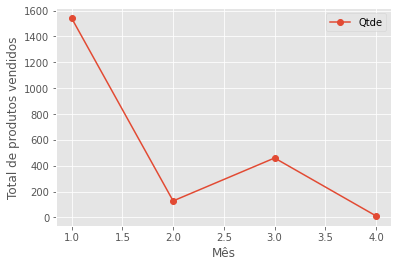

In [80]:
#Gráfico total de produtos vendidos por mês de 2019
df_2019.groupby(df_2019['mes_venda'])["Qtde"].sum().plot(marker="o")
plt.xlabel('Mês')
plt.ylabel("Total de produtos vendidos")
plt.legend()

(array([191., 193., 221.,  85.,  54.,  61.,  38.,  31.,  14.,   6.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

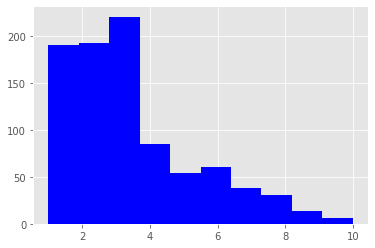

In [81]:
#Histograma com .hist
plt.hist(df["Qtde"], color="blue")

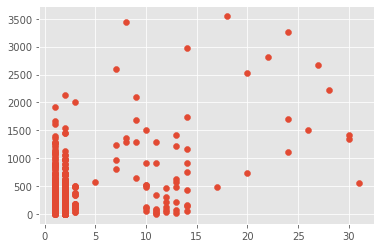

In [82]:
#Gráfico de dispersão com .scatter de espalhar
plt.scatter(x=df_2019["dia_venda"], y=df_2019["Receita"])

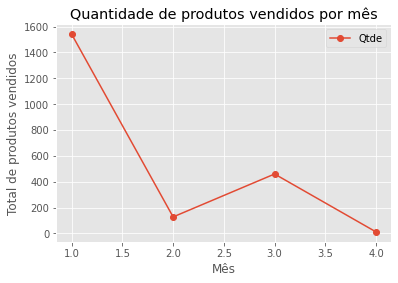

In [83]:
#Salvando em png com plt.savefig()
df_2019.groupby(df_2019['mes_venda'])["Qtde"].sum().plot(marker="o")
plt.title('Quantidade de produtos vendidos por mês')
plt.xlabel('Mês')
plt.ylabel("Total de produtos vendidos")
plt.legend()
plt.savefig("grafico QTDE x MES.png")